# Series 2 Exercise 1 Solution
## 1. Checking Stability of the system

The given set of equations for three systems will be stable by themseleves if the absoulute value of all eigen values of the system (without controls) are less than 1. i.e. $| \lambda |< 1$ 

### 1) For the first system:
$$ A =  \begin{bmatrix} 0.5 & 0 & 0.5 \\ 0 & 0 & 2 \\ 4 & 2 & 1 \end{bmatrix} $$

In [4]:
import numpy as np
A = np.array([[0.5,0.,0.5],[0.,0.,2.0],[4.,2.,1.]])
Eig, Ev = np.linalg.eig(A)
print('Eigen values: ',Eig)
print('Abs Eig1: ',np.absolute(Eig[0]))
print('Abs Eig2: ',np.absolute(Eig[1]))
print('Abs Eig3: ',np.absolute(Eig[2]))

Eigen values:  [ 3.07645685  0.33933645 -1.91579331]
Abs Eig1:  3.0764568544408957
Abs Eig2:  0.3393364524664816
Abs Eig3:  1.9157933069073763


Hence, this system is not stable as two of the eigen values are greater than 1.

### 2) For the second system:
$$ A =  \begin{bmatrix} 0.5 & 0 & 0.5 \\ 0 & 0 & -0.5 \\ 0.5 & 0.5 & 0.5 \end{bmatrix} $$

In [5]:
A = np.array([[0.5,0.,0.5],[0.,0.,-.50],[0.5,0.5,0.5]]) 
Eig, Ev = np.linalg.eig(A)
print('Eigen values: ',Eig)
print('Abs Eig1: ',np.absolute(Eig[0]))
print('Abs Eig2: ',np.absolute(Eig[1]))
print('Abs Eig3: ',np.absolute(Eig[2]))

Eigen values:  [0.87743883+0.j         0.06128058+0.37243088j 0.06128058-0.37243088j]
Abs Eig1:  0.8774388331233467
Abs Eig2:  0.37743883312334653
Abs Eig3:  0.37743883312334653


Hence, this system is stable as all of the eigen values are less than 1.

### 3) For the third system:
$$ A =  \begin{bmatrix} 2 & 0 & 0. \\ 0 & 0 & -2 \\ 1 & 1 & 0 \end{bmatrix} $$

In [6]:
A = np.array([[2.0,0.,0.],[0.,0.,-2],[1.,1.,0.]]) 
Eig, Ev = np.linalg.eig(A)
print('Eigen values: ',Eig)
print('Abs Eig1: ',np.absolute(Eig[0]))
print('Abs Eig2: ',np.absolute(Eig[1]))
print('Abs Eig3: ',np.absolute(Eig[2]))

Eigen values:  [0.+1.41421356j 0.-1.41421356j 2.+0.j        ]
Abs Eig1:  1.4142135623730951
Abs Eig2:  1.4142135623730951
Abs Eig3:  2.0


Hence, this system is not stable as allthe eigen values are greater than 1.

## 2. Checking Controllability of the system 

A dynamic system is controllable if the controllability matrix composed out of it has full rank. This also signifies the controllability of the system which is ability of the system to be driven from a starting state to any desired state.

In [7]:
def check_controllability(A,B):
    """
    This function checks the controllability for system
    C=[B AB A^2B] controllability matrix
    """
    C = np.concatenate([B, np.dot(A, B), np.dot(A, A).dot(B)], axis=1)
    Rank = np.linalg.matrix_rank(C)
    print('rank is',Rank)
    if Rank< np.linalg.matrix_rank(A):
        print('System is not controllable')
    else:print('System is controllable')

### 1) For the first system:


$$ A =  \begin{bmatrix} 2 & 0 & 0. \\ 0 & 0 & -2 \\ 1 & 1 & 0 \end{bmatrix}  \text{ and }  B =  \begin{bmatrix} 0 & 0 \\ 1 & 0 \\ 0 & 1 \end{bmatrix} $$

In [8]:
A = np.array([[0.5,0.,0.5],[0.,0.,2.0],[4.,2.,1.]])
B = np.array([[0.,0.],[1.,0.],[0.,1.]])
check_controllability(A,B)

rank is 3
System is controllable


### 1) For the second system:


$$ A =  \begin{bmatrix} 0.5 & 0 & 0.5 \\ 0 & 0 & -0.5 \\ 0.5 & 0.5 & 0.5 \end{bmatrix}  \text{ and }  B =  \begin{bmatrix} 0 & 0 \\ 1 & 0 \\ 0 & 1 \end{bmatrix} $$

In [9]:
A = np.array([[0.5,0.,0.5],[0.,0.,-.50],[0.5,0.5,0.5]]) 
B = np.array([[0.,0.],[1.,0.],[0.,1.]])
check_controllability(A,B)

rank is 3
System is controllable


### 1) For the third system:


$$ A =  \begin{bmatrix} 2 & 0 & 0. \\ 0 & 0 & -2 \\ 1 & 1 & 0 \end{bmatrix}  \text{ and }  B =  \begin{bmatrix} 0 & 0 \\ 1 & 0 \\ 0 & 1 \end{bmatrix} $$

In [10]:
A = np.array([[2.0,0.,0.],[0.,0.,-2],[1.,1.,0.]]) 
B = np.array([[0.,0.],[1.,0.],[0.,1.]])
check_controllability(A,B)

rank is 2
System is not controllable


## 3. Driving the system to the origin from any initial conditions

For LQR implementation, we need a linear system with quadratic cost function. In cases where the cost function is not quadratic, we can linearize a system about a fixed point(origin in this case) and drive it desirably. 
If it is given that the cost involved with the system is of quadratic nature:
1. For the first system, since it is controllable, using LQR design we can drive the system from any point to any other point. 
2. Similarly, second system can also be driven from one state to another(and to origin).
3. as system three is not controlllable, we can not drive it to a particular desired point.

Horizon lenghts are dependent on the cost function and horizon length is computed for one such cost function in the following section. 

## 4. compute the optimal control policy to minimize the following cost function
cost function:
$$ \Sigma^{\infty}_{n=0} = 100\bf{x}^T_n\vec{x}_n + u^T_n.u_n $$
What are the optimal gains? Simulate the uncontrolled and controlled system use 
$$x_0 = [10, 10, 10]^T $$
and plot the time evolution of
$$x_n \text{ and } {u_n} $$ 
Discuss the simulation results with respect to the answer to the previous question

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def ricatti_converger(A, B, Q, R):  
    """
    This function solves the backward Riccatti equations for regulator problems of the form
    min xQx + sum(xQx + uRu) subject to xn+1 = Axn + Bun

    Arguments:
    A, B, Q, R: numpy arrays defining the problem



    """
    P = []  # will contain the list of Ps from N to 0
    K = []  # will contain the list of Ks from N-1 to 0

    Infinite_State = 1 
    Pn = Q  
    P.append(Pn)
    Boolean_condition = True  
    Kn_plus_1 = np.array([])
    Pn_plus_1 = np.array([])  
    while Infinite_State > 0 and Boolean_condition:
        Kn = -1 * np.linalg.inv(R + np.dot(B.T, Pn).dot(B)).dot(np.dot(B.T, Pn).dot(A))  #comment the equation here
        if len(K) > 0:
            Kn_plus_1 = K[-1]
        K.append(Kn)
        Pn = Q + np.dot(A.T, Pn).dot(A) + np.dot(np.dot(np.dot(A.T, Pn), B), Kn)
        if len(P) > 0:
            Pn_plus_1 = P[-1]
        P.append(Pn)
        normk = (round(np.linalg.norm(Kn), 8))  # other methods to round off
        normk1 = (round(np.linalg.norm(Kn_plus_1), 8))
        normp = (round(np.linalg.norm(Pn), 8))
        normp1 = (round(np.linalg.norm(Pn_plus_1), 8))
        if len(Kn_plus_1) > 0 and len(Pn_plus_1) > 0:
            if normk == normk1 and normp == normp1:
                Boolean_condition = False
                converged_K = Kn  # converged_K
                converged_P = Pn  # converged_P
                print("Optimal Gain, K =", converged_K[-1,])
                #print(" P =", converged_P)
        
        Infinite_State = Infinite_State + 1
    print("Horizon =", Infinite_State)
    return converged_P, converged_K


def system_output_nc( A,B,x0, K): 
    """
    This function calculates the state xn for each step with 0 control
    xn+1 = Axn
    un=Kn*xn
    Arguments:
    A, B, x0, K

    Returns:
    X: list of numpy arrays containing states xn from 0 to N
    time: list of numpy arrays containing time step from 0 to N
    """
    X = np.zeros([x0.size, horizon_length])
    xn = x0
    time = []
    for i in range(horizon_length):
        X[:, i] = xn
        xn = A.dot(xn) 
        time.append(i)
    return X, time


def xn_plus_1(A, B, x0, K):  
    """
    This function calculates the state xn for each step
    xn+1 = Axn + Bun
    un=Kn*xn
    Arguments:
    A, B, x0, K

    Returns:
    X: list of numpy arrays containing states xn from 0 to N
    time: list of numpy arrays containing time step from 0 to N
    """
    X = np.zeros([x0.size, horizon_length])
    u = []
    xn = x0
    time = []
    for i in range(horizon_length):
        X[:, i] = xn
        u.append(K.dot(xn))
        xn = A.dot(xn) + B.dot(K.dot(xn))
        time.append(i)

    return X, u, time

### 1) For the first system:

Optimal Gain, K = [-4.08970916 -1.98540176 -1.12620475]
Horizon = 16


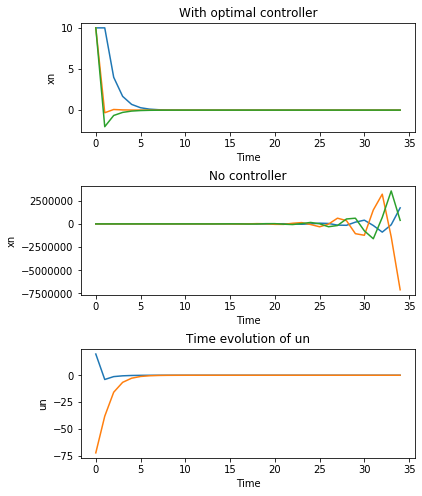

In [8]:
x0 = np.array([10., 10., 10.])
Q = np.eye(3) * 100
R = 1 * np.eye(1)
A1 = np.array([[0.5, 0., 0.5], [0., 0, -2], [4, 2, 1]])
B1 = np.array([[0., 0.], [1., 0.], [0., 1.]])
horizon_length = 35
P1, K1 = ricatti_converger(A1, B1, Q, R)
X, u, time = xn_plus_1(A1, B1, x0, K1)
X_no_contrl, time = system_output_nc(A1, B1, x0, K1)
plt.figure(figsize=(6, 8))
plt.subplots_adjust(wspace=0, hspace=0.5)
plt.subplot(3, 1, 1)
plt.plot(time, X[0, :])
plt.plot(time, X[1, :])
plt.plot(time, X[2, :])
plt.ylabel('xn')
plt.title('With optimal controller')
plt.xlabel('Time')
plt.subplot(3, 1, 2)
plt.plot(time, X_no_contrl[0, :])
plt.plot(time, X_no_contrl[1, :])
plt.plot(time, X_no_contrl[2, :])
plt.ylabel('xn')
plt.title('No controller')
plt.xlabel('Time')
plt.subplot(3, 1, 3)
plt.plot(time, u)
plt.title('Time evolution of un')
plt.xlabel('Time')
plt.ylabel('un')
plt.show()


### 2) For the second system:

Optimal Gain, K = [-0.61394449 -0.49625189 -0.6176926 ]
Horizon = 15


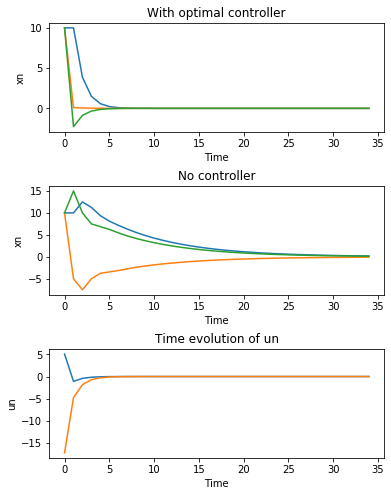

In [9]:
x0 = np.array([10., 10., 10.])
Q = np.eye(3) * 100
R = 1 * np.eye(1)
A2 = np.array([[0.5, 0., 0.5], [0., 0, -0.5], [0.5, 0.5, 0.5]])
B2 = np.array([[0., 0.], [1., 0.], [0., 1.]])
horizon_length = 35
P2, K2 = ricatti_converger(A2, B2, Q, R)
X, u, time = xn_plus_1(A2, B2, x0, K2)
X_no_contrl, time = system_output_nc(A2, B2, x0, K2)

# PLOTS
plt.figure(figsize=(6, 8))
plt.subplots_adjust(wspace=0, hspace=0.5)
plt.subplot(3, 1, 1)
plt.plot(time, X[0, :])
plt.plot(time, X[1, :])
plt.plot(time, X[2, :])
plt.ylabel('xn')
plt.title('With optimal controller')
plt.xlabel('Time')
plt.subplot(3, 1, 2)
plt.plot(time, X_no_contrl[0, :])
plt.plot(time, X_no_contrl[1, :])
plt.plot(time, X_no_contrl[2, :])
plt.ylabel('xn')
plt.title('No controller')
plt.xlabel('Time')
plt.subplot(3, 1, 3)
plt.plot(time, u)
plt.title('Time evolution of un')
plt.xlabel('Time')
plt.ylabel('un')
plt.show()


### 3) For the third system:

Optimal Gain, K = [-0.95385463 -0.99037846 -0.01924307]
Horizon = 255


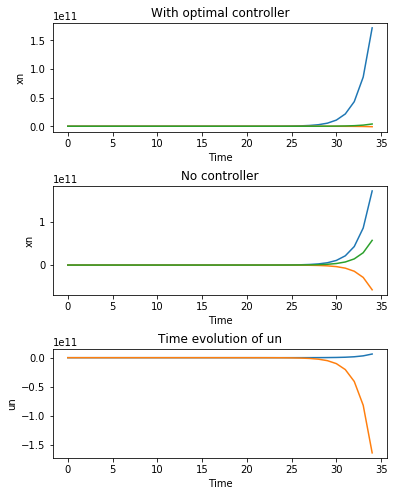

In [15]:

x0 = np.array([10., 10., 10.])
Q = np.eye(3) * 100
R = 1 * np.eye(1)
A3 = np.array([[2, 0, 0], [0, 0, -2], [1, 1, 0]])
B3 = np.array([[0., 0.], [1., 0.], [0., 1.]])
horizon_length = 35
P3, K3 = ricatti_converger(A3, B3, Q, R)
X, u, time = xn_plus_1(A3, B3, x0, K3)
X_no_contrl, time = system_output_nc(A3, B3, x0, K3)
plt.figure(figsize=(6, 8))
plt.subplots_adjust(wspace=0, hspace=0.5)
plt.subplot(3, 1, 1)
plt.plot(time, X[0, :])
plt.plot(time, X[1, :])
plt.plot(time, X[2, :])
plt.ylabel('xn')
plt.title('With optimal controller')
plt.xlabel('Time')
plt.subplot(3, 1, 2)
plt.plot(time, X_no_contrl[0, :])
plt.plot(time, X_no_contrl[1, :])
plt.plot(time, X_no_contrl[2, :])
plt.ylabel('xn')
plt.title('No controller')
plt.xlabel('Time')
plt.subplot(3, 1, 3)
plt.plot(time, u)
plt.title('Time evolution of un')
plt.xlabel('Time')
plt.ylabel('un')
plt.show()
